# GAP and Adidas: 
# Technical Analysis, Machine Learning and the Yeezy Effect

### Table of Contents:
#### 1. Data Collection
#### 2. Visualization
#### 3. Technical Indicators: MA, Candlestick and EWMA 
#### 4. Financial and Statistical Anlalysis 
#### 5. OLS: statsmodels.api 
#### 6. Linear Regression: sklearn 
#### 7. k-Nearest Neighbors 
#### 8. Neural Networks: Mutilayer Perceptron

# 1.Data Collection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader as pdr
import datetime 
gap = pdr.get_data_yahoo('GPS', start=datetime.datetime(2010, 1, 1), end=datetime.datetime(2020, 9, 1))
adidas = pdr.get_data_yahoo('ADS.DE', start=datetime.datetime(2010, 1, 1), end=datetime.datetime(2020, 9, 1))

In [4]:
gap.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,20.730000,20.450001,20.730000,20.540001,9185600.0,14.656257
2010-01-05,21.059999,20.469999,20.600000,20.790001,18297100.0,14.834647
2010-01-06,21.080000,20.580000,20.700001,21.040001,15155100.0,15.013032
2010-01-07,21.389999,19.959999,21.389999,20.270000,24846500.0,14.463597
2010-01-08,20.450001,20.080000,20.299999,20.400000,10904100.0,14.556362


In [5]:
gap.shape

(2685, 6)

In [6]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2685 entries, 2010-01-04 to 2020-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2685 non-null   float64
 1   Low        2685 non-null   float64
 2   Open       2685 non-null   float64
 3   Close      2685 non-null   float64
 4   Volume     2685 non-null   float64
 5   Adj Close  2685 non-null   float64
dtypes: float64(6)
memory usage: 146.8 KB


In [7]:
gap.to_csv('GAP_Stock.csv')

In [8]:
adidas.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,38.525002,37.685001,37.959999,38.505001,953276.0,32.082249
2010-01-05,40.049999,38.820000,39.000000,39.720001,2463075.0,33.094582
2010-01-06,40.064999,39.095001,39.799999,39.400002,1099488.0,32.827965
2010-01-07,40.000000,39.115002,39.365002,39.744999,1085415.0,33.115417
2010-01-08,39.994999,39.250000,39.724998,39.599998,719621.0,32.994598


In [9]:
adidas.shape

(2705, 6)

In [10]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2705 entries, 2010-01-04 to 2020-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2705 non-null   float64
 1   Low        2705 non-null   float64
 2   Open       2705 non-null   float64
 3   Close      2705 non-null   float64
 4   Volume     2705 non-null   float64
 5   Adj Close  2705 non-null   float64
dtypes: float64(6)
memory usage: 147.9 KB


In [11]:
adidas.to_csv('Adidas_Stock.csv')

# 2.Visualization

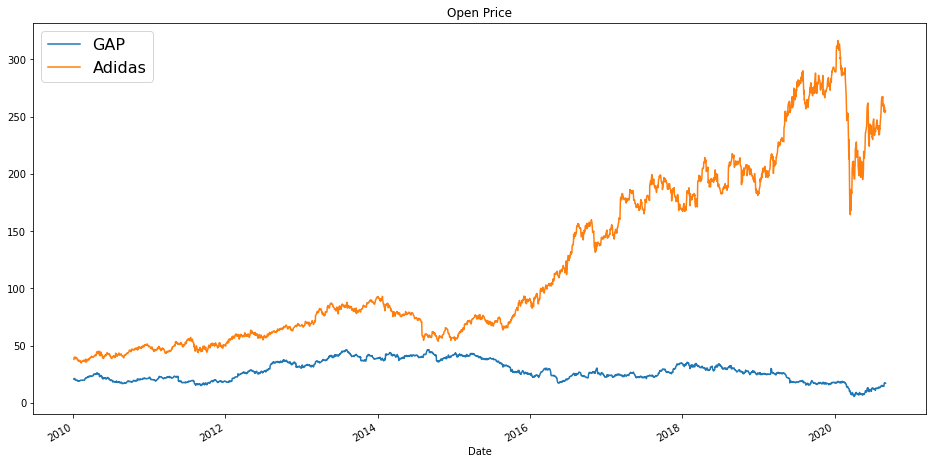

In [12]:
gap['Open'].plot(label='GAP',figsize=(16,8),title='Open Price')
adidas['Open'].plot(label='Adidas')
plt.legend(loc=2,prop={'size': 16});

## a) Volume Analyisis


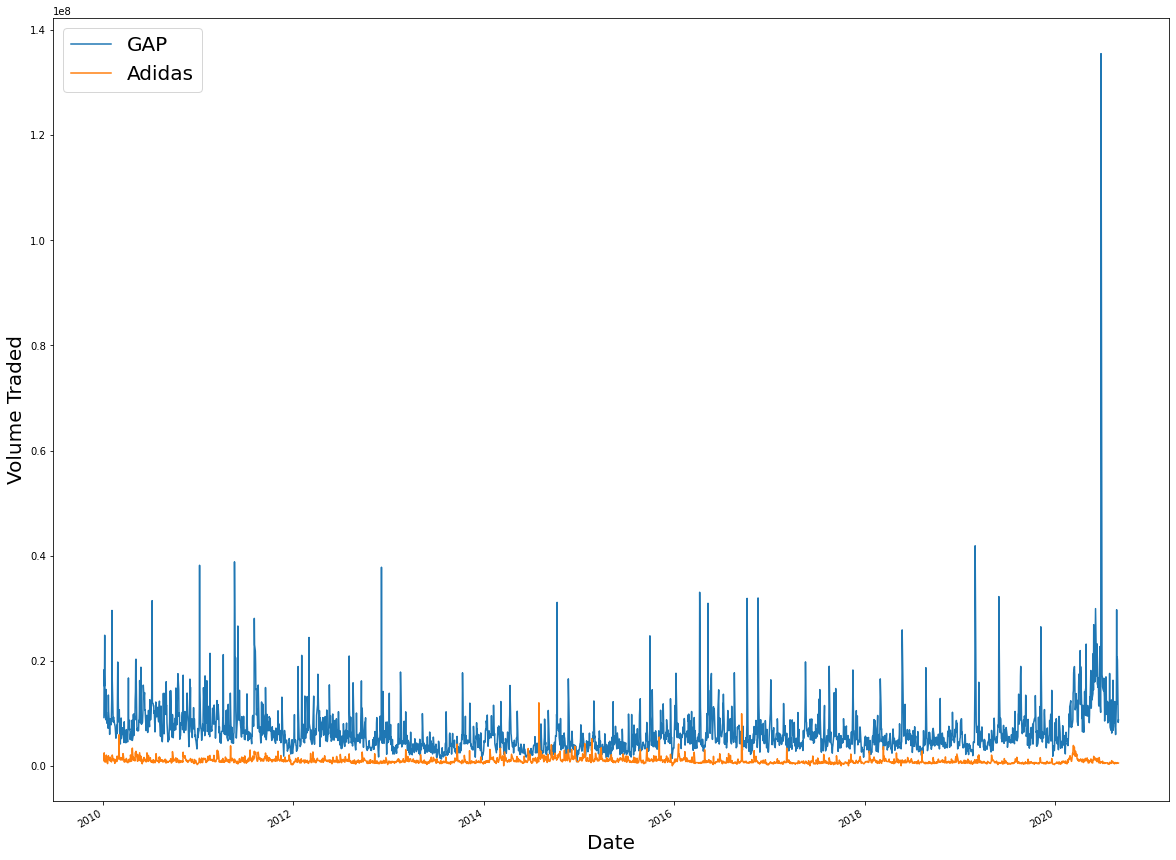

In [13]:
gap['Volume'].plot(label='GAP',figsize=(20,16))
adidas['Volume'].plot(label='Adidas')
plt.legend(loc=2,prop={'size': 20})
plt.xlabel('Date',fontsize=20)
plt.ylabel('Volume Traded',fontsize=20);

## b) What happened when the volume traded was at its peak?

In [14]:
gap.index[gap['Volume'].argmax()]
#https://www.nytimes.com/2020/06/26/business/kanye-west-yeezy-gap.html

Timestamp('2020-06-26 00:00:00')

In [15]:
adidas.index[adidas['Volume'].argmax()]
#https://www.cnbc.com/2014/07/31/adidas-shares-plunge-14-after-russia-warning.html

Timestamp('2014-07-31 00:00:00')

## c) Lets assume that:
#### Market Capitalisation = Share Price x Number of Shares Outstanding

In [16]:
gap['Market Cap'] = gap['Open'] * gap['Volume']
adidas['Market Cap'] = adidas['Open'] * adidas['Volume']

Text(0, 0.5, 'Market Cap')

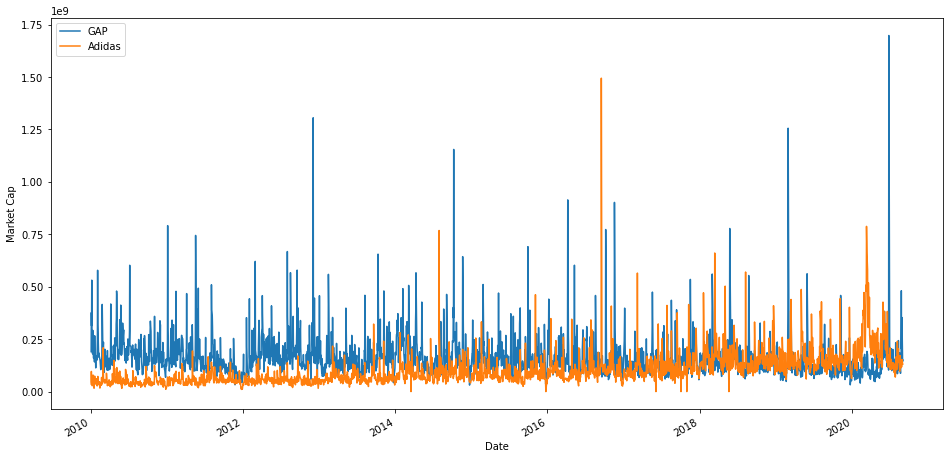

In [17]:
gap['Market Cap'].plot(label='GAP',figsize=(16,8))
adidas['Market Cap'].plot(label='Adidas')
plt.legend()
plt.ylabel('Market Cap')

In [18]:
gap.index[gap['Market Cap'].argmax()]

Timestamp('2020-06-26 00:00:00')

In [19]:
adidas.index[adidas['Market Cap'].argmax()]

Timestamp('2016-09-16 00:00:00')

# 3.Technical Indicators: MA, Candlestick and EWMA

## a) The Moving Average Indicator

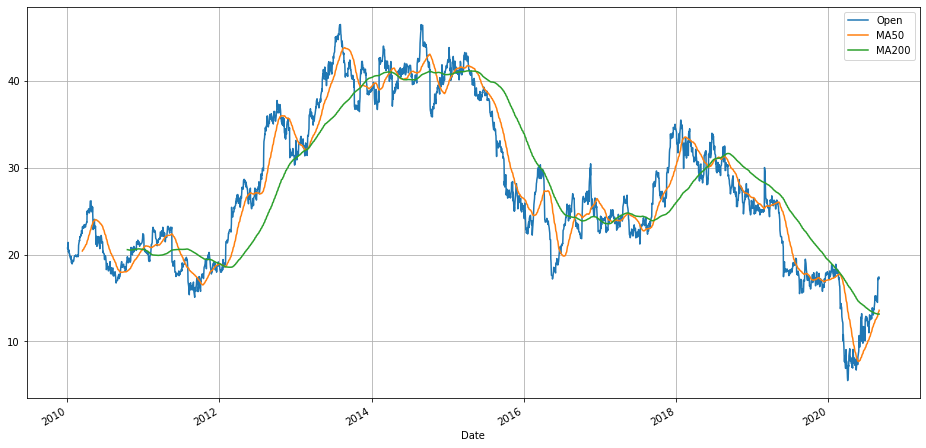

In [20]:
gap['MA50'] = gap['Open'].rolling(50).mean()
gap['MA200'] = gap['Open'].rolling(200).mean()
gap[['Open','MA50','MA200']].plot(label='GAP',figsize=(16,8),grid=True);

In [21]:
gap['MA50'].head(10)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
Name: MA50, dtype: float64

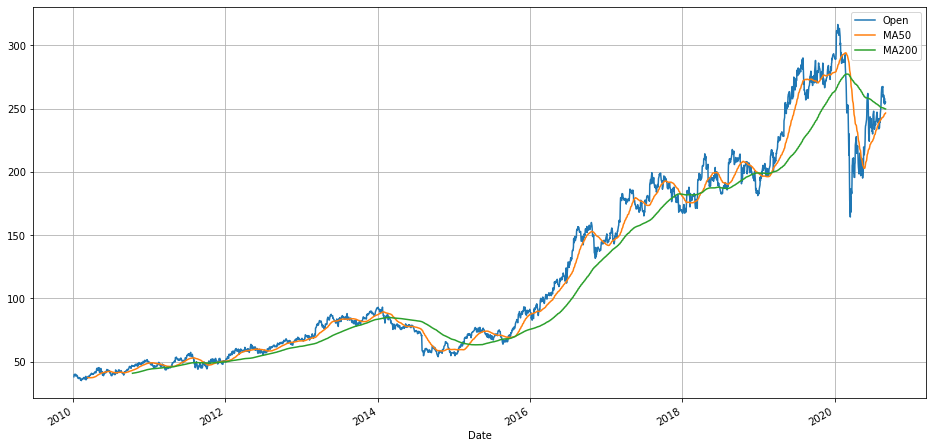

In [22]:
adidas['MA50'] = adidas['Open'].rolling(50).mean()
adidas['MA200'] = adidas['Open'].rolling(200).mean()
adidas[['Open','MA50','MA200']].plot(label='GAP',figsize=(16,8),grid=True);

## b) The Candlestick Indicator

In [23]:
import mplfinance as mpf

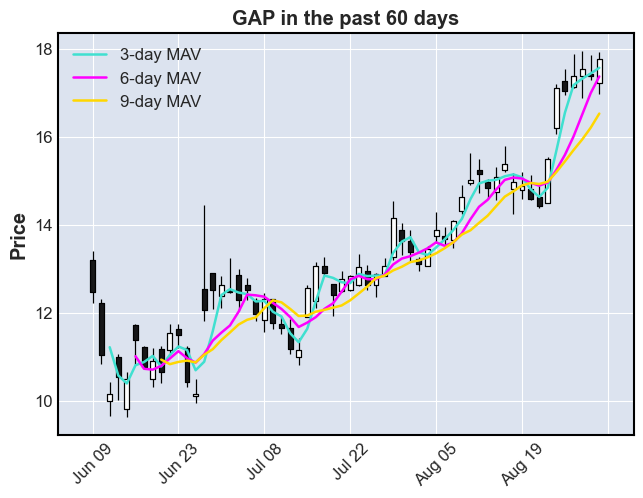

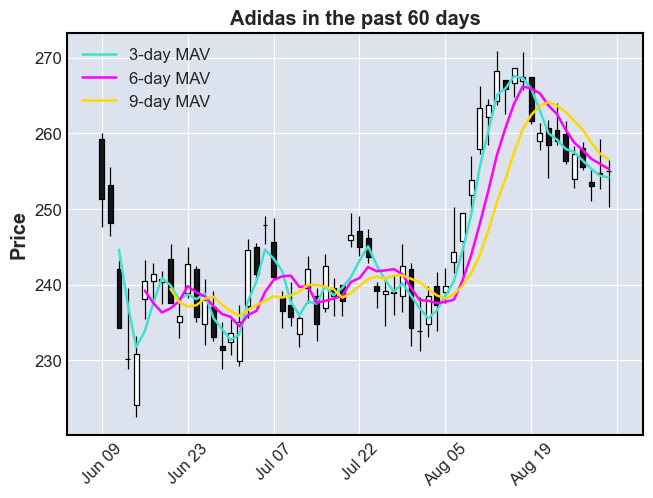

In [24]:
fig, axes = mpf.plot(gap[-60:], type='candle', mav=(3,6,9), returnfig=True)
# Configure chart legend and title
axes[0].legend(('3-day MAV','6-day MAV','9-day MAV'))
axes[0].set_title('GAP in the past 60 days',weight='bold')

fig, axes = mpf.plot(adidas[-60:], type='candle', mav=(3,6,9), returnfig=True)
# Configure chart legend and title
axes[0].legend(('3-day MAV','6-day MAV','9-day MAV'))
axes[0].set_title('Adidas in the past 60 days',weight='bold');

## c) EWMA (Exponentially-weighted moving average)

### GAP's EWMA

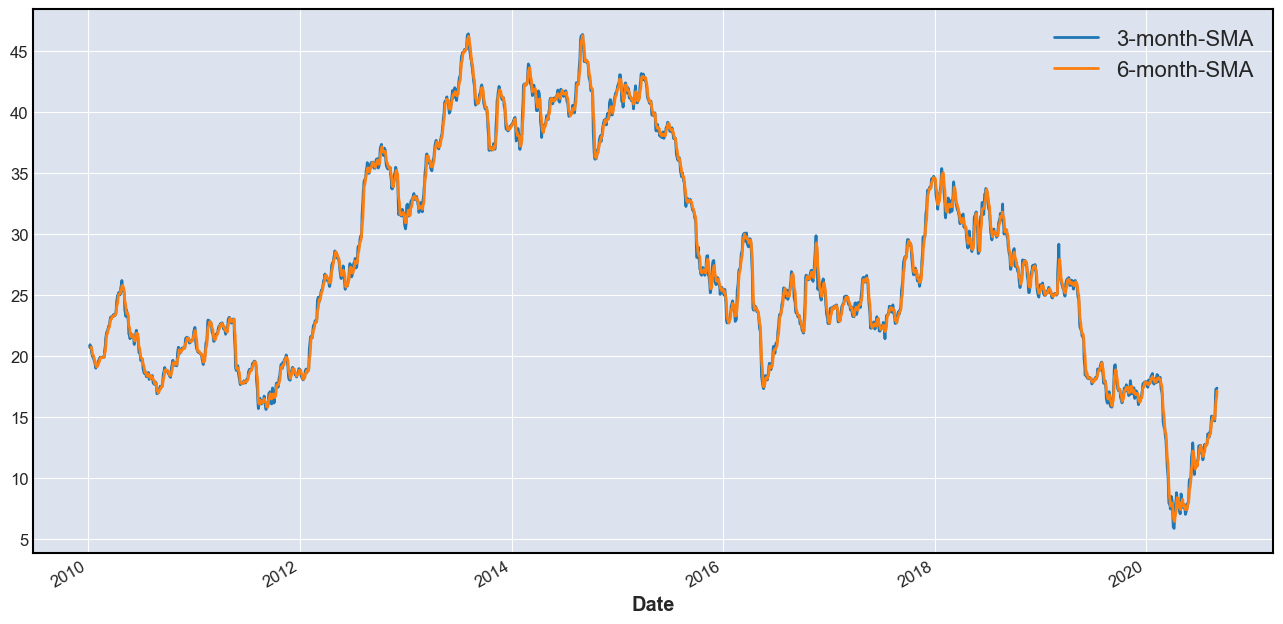

In [25]:
data_gap = gap

data_gap['3-month-SMA'] = data_gap['Open'].rolling(window=3).mean()
data_gap['6-month-SMA'] = data_gap['Open'].rolling(window=6).mean()
data_gap[['3-month-SMA','6-month-SMA']].plot(label='GAP',figsize=(16,8),grid=True)
plt.legend(fontsize=16);

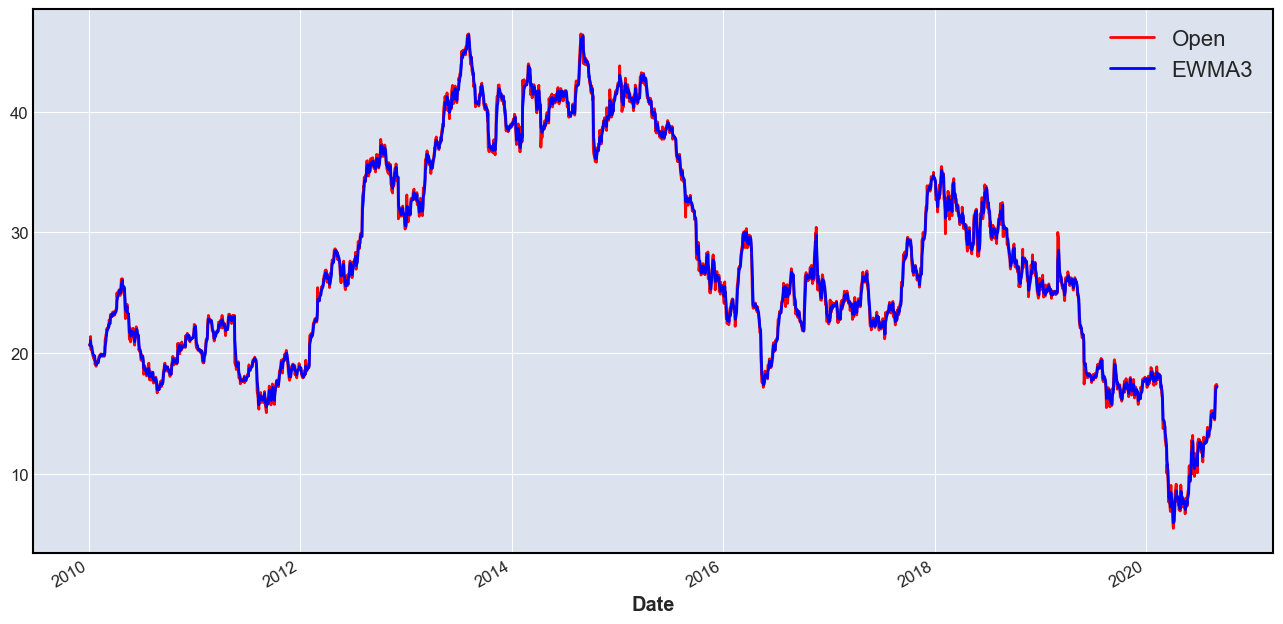

In [26]:
data_gap['EWMA3'] = data_gap['Open'].ewm(span=3).mean()
data_gap['Open'].plot(figsize=(16,8),color=('red'))
data_gap['EWMA3'].plot(figsize=(16,8),color=('blue'))
plt.legend(fontsize=16);

### Adidas's EWMA

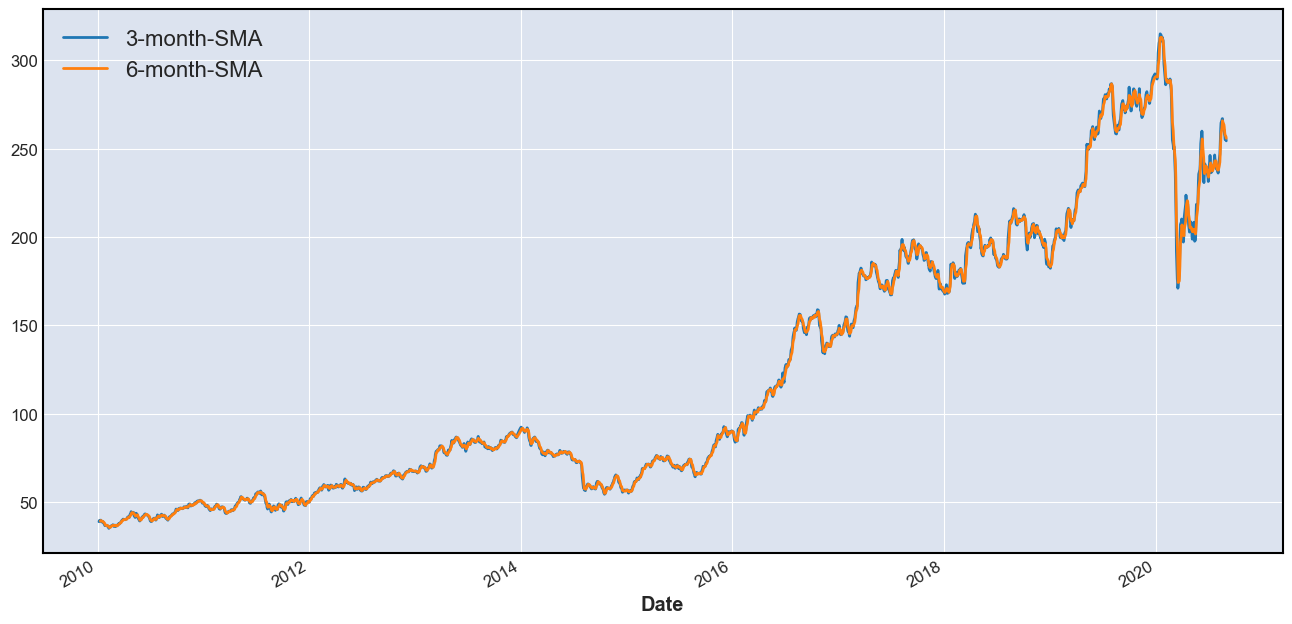

In [27]:
data_adidas = adidas

data_adidas['3-month-SMA'] = data_adidas['Open'].rolling(window=3).mean()
data_adidas['6-month-SMA'] = data_adidas['Open'].rolling(window=6).mean()
data_adidas[['3-month-SMA','6-month-SMA']].plot(label='Adidas',figsize=(16,8),grid=True)
plt.legend(fontsize=16);

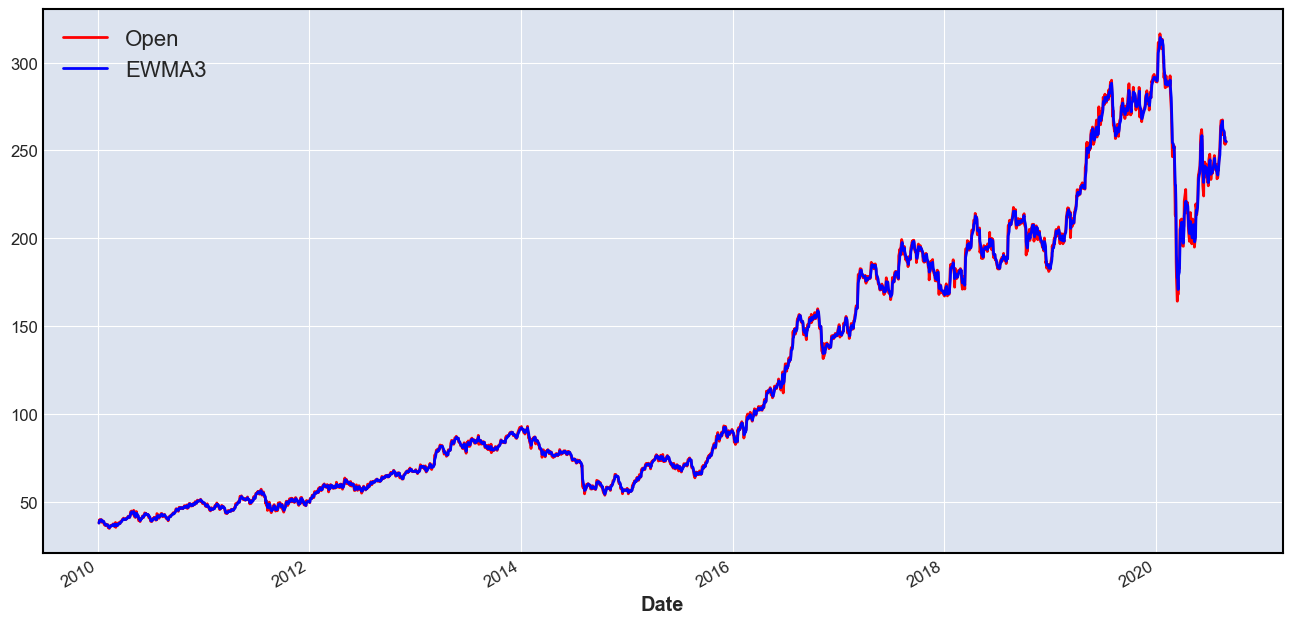

In [28]:
data_adidas['EWMA3'] = data_adidas['Open'].ewm(span=3).mean()
data_adidas['Open'].plot(figsize=(16,8),color=('red'))
data_adidas['EWMA3'].plot(figsize=(16,8),color=('blue'))
plt.legend(fontsize=16);

# 4.Financial and Statistical Analysis

In [29]:
gap[-60:]['Close'].argmax()

59

In [30]:
gap[-60:]['Open'].argmax()

58

### The result of striking a deal with Yeezy

In [31]:
gap[-60:][20:60]

,High,Low,Open,Close,Volume,Adj Close,Market Cap,MA50,MA200,3-month-SMA,6-month-SMA,EWMA3
Date,,,,,,,,,,,,
2020-07-08,12.450000,11.560000,11.830000,12.320000,14160900.0,12.320000,1.675234e+08,9.9610,13.74510,12.246667,12.413333,12.143898
2020-07-09,12.300000,11.630000,12.300000,11.770000,13066100.0,11.770000,1.607130e+08,10.0438,13.72150,12.140000,12.400000,12.221949
2020-07-10,11.930000,11.510000,11.740000,11.650000,8517500.0,11.650000,9.999545e+07,10.0968,13.69235,11.956667,12.271667,11.980975
2020-07-13,11.850000,11.060000,11.660000,11.180000,14044900.0,11.180000,1.637635e+08,10.1548,13.66485,11.900000,12.073333,11.820487
2020-07-14,11.430000,10.810000,11.000000,11.150000,11828100.0,11.150000,1.301091e+08,10.2202,13.63410,11.466667,11.803333,11.410244
2020-07-15,12.620000,11.890000,11.910000,12.570000,16927300.0,12.570000,2.016041e+08,10.3084,13.60825,11.523333,11.740000,11.660122
2020-07-16,13.140000,12.110000,12.270000,13.070000,15551100.0,13.070000,1.908120e+08,10.3918,13.58350,11.726667,11.813333,11.965061
2020-07-17,13.260000,12.840000,13.060000,12.890000,9777100.0,12.890000,1.276889e+08,10.4998,13.56185,12.413334,11.940000,12.512531
2020-07-20,12.640000,11.920000,12.640000,12.410000,12260300.0,12.410000,1.549702e+08,10.6072,13.54050,12.656667,12.090000,12.576266


## a) Yeezy's Influence on GAP

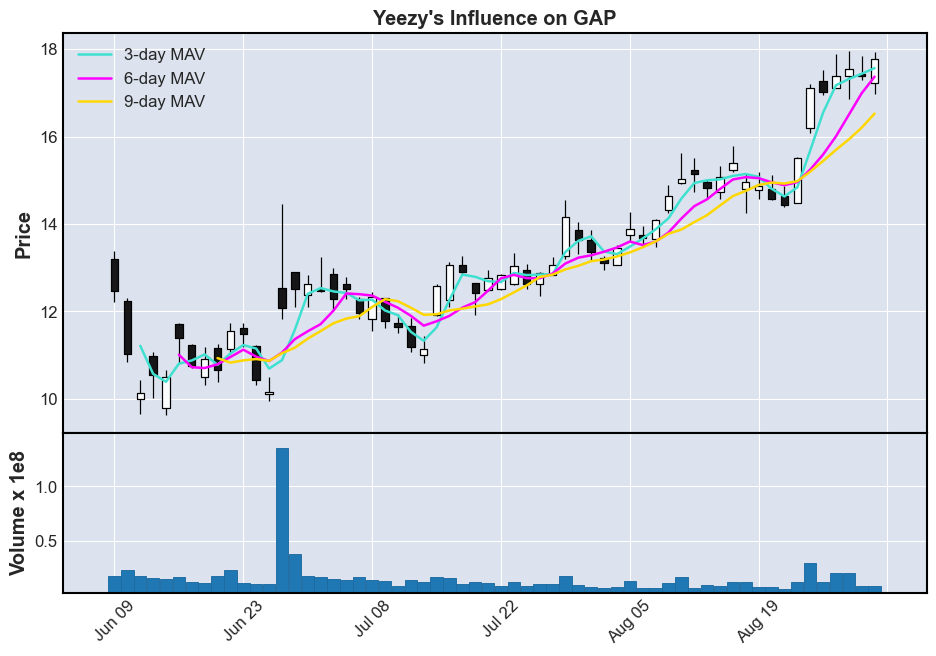

In [32]:
fig, axes = mpf.plot(gap[-60:],type='candle',volume=True,mav=(3,6,9), returnfig=True,figsize=(12,8))
# Configure chart legend and title
axes[0].legend(('3-day MAV','6-day MAV','9-day MAV'))
axes[0].set_title('Yeezy\'s Influence on GAP',weight='bold');


## b) Correlation and Scatter Matrix

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
#add volume, adj close...
sector = pd.concat([gap['Open'],adidas['Open']], axis=1) 

In [36]:
sector.columns = ['GAP Open', 'Adidas Open']

In [37]:
sector

,GAP Open,Adidas Open
Date,,
2010-01-04,20.730000,37.959999
2010-01-05,20.600000,39.000000
2010-01-06,20.700001,39.799999
2010-01-07,21.389999,39.365002
2010-01-08,20.299999,39.724998
...,...,...
2020-08-26,17.260000,254.000000
2020-08-27,17.120001,258.000000
2020-08-28,17.379999,253.500000


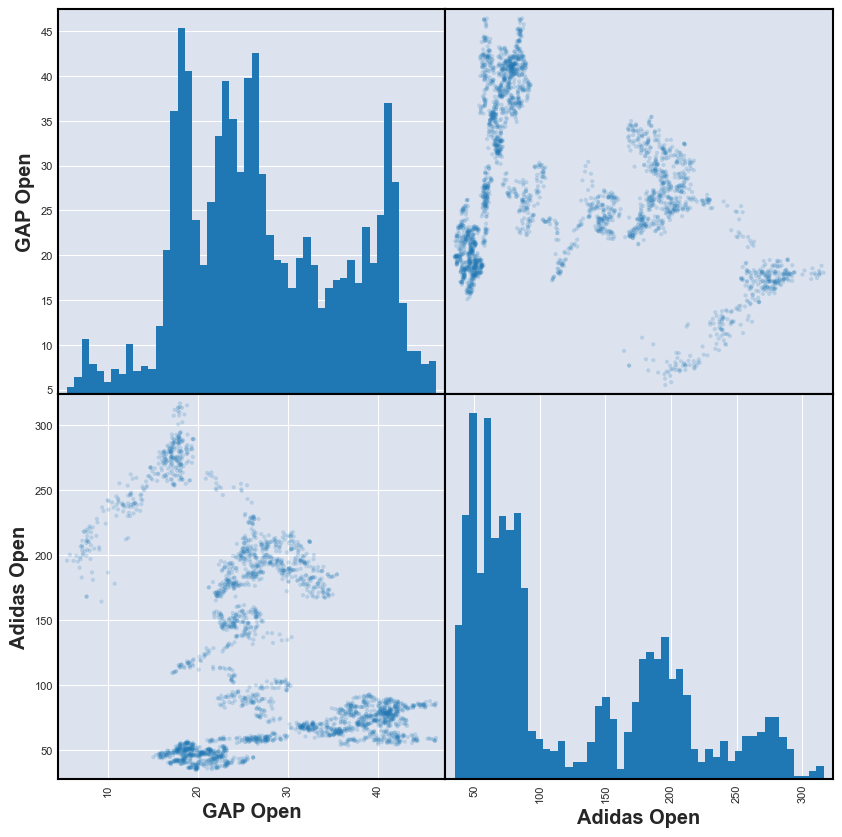

In [38]:
scatter_matrix(sector,figsize=(10,10),alpha=0.2, hist_kwds={'bins':50});

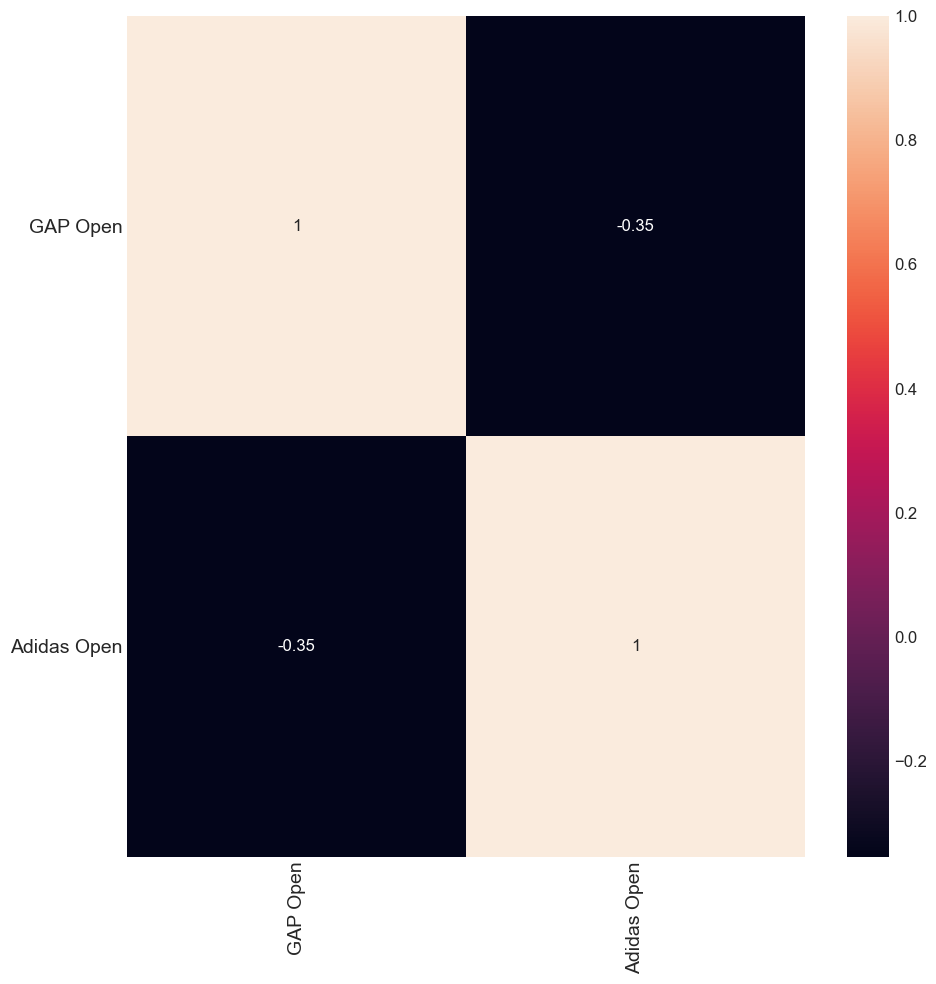

In [39]:
import seaborn as sns
corr = sector.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax=sns.heatmap(corr,annot= True)

plt.yticks(rotation=0, size = 14) 
plt.xticks(rotation=90, size = 14)  
plt.tight_layout()  
plt.show();

## c) Returns Research

In [40]:
gap['Returns'] = (gap['Close'] / gap['Close'].shift(1)) - 1

In [41]:
gap.tail()

,High,Low,Open,Close,Volume,Adj Close,Market Cap,MA50,MA200,3-month-SMA,6-month-SMA,EWMA3,Returns
Date,,,,,,,,,,,,,
2020-08-26,17.530001,16.950001,17.260000,17.030001,11749800.0,17.030001,2.028016e+08,13.0822,13.14110,15.983334,15.363334,16.333064,-0.004676
2020-08-27,17.879999,17.110001,17.120001,17.379999,20670600.0,17.379999,3.538807e+08,13.2002,13.14400,16.860001,15.753334,16.726533,0.020552
2020-08-28,17.950001,16.870001,17.379999,17.540001,20169500.0,17.540001,3.505459e+08,13.3378,13.14545,17.253333,16.181667,17.053266,0.009206
2020-08-31,17.850000,17.299999,17.420000,17.389999,8253700.0,17.389999,1.437795e+08,13.4628,13.14770,17.306667,16.645000,17.236633,-0.008552
2020-09-01,17.930000,16.980000,17.230000,17.770000,8723100.0,17.770000,1.502990e+08,13.5844,13.15020,17.343333,17.101667,17.233316,0.021852


In [42]:
adidas['Returns'] = (adidas['Close'] / adidas['Close'].shift(1)) - 1

In [43]:
adidas.head()

,High,Low,Open,Close,Volume,Adj Close,Market Cap,MA50,MA200,3-month-SMA,6-month-SMA,EWMA3,Returns
Date,,,,,,,,,,,,,
2010-01-04,38.525002,37.685001,37.959999,38.505001,953276.0,32.082249,3.618636e+07,NaN,NaN,NaN,NaN,37.959999,NaN
2010-01-05,40.049999,38.820000,39.000000,39.720001,2463075.0,33.094582,9.605992e+07,NaN,NaN,NaN,NaN,38.653333,0.031554
2010-01-06,40.064999,39.095001,39.799999,39.400002,1099488.0,32.827965,4.375962e+07,NaN,NaN,38.919999,NaN,39.308571,-0.008056
2010-01-07,40.000000,39.115002,39.365002,39.744999,1085415.0,33.115417,4.272736e+07,NaN,NaN,39.388334,NaN,39.338667,0.008756
2010-01-08,39.994999,39.250000,39.724998,39.599998,719621.0,32.994598,2.858694e+07,NaN,NaN,39.630000,NaN,39.538064,-0.003648


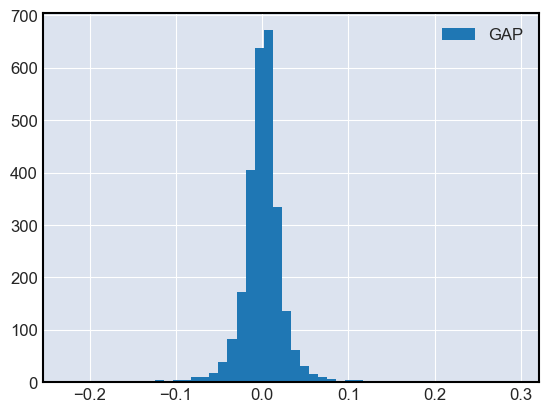

In [44]:
gap['Returns'].hist(bins=50,label='GAP')
plt.legend();

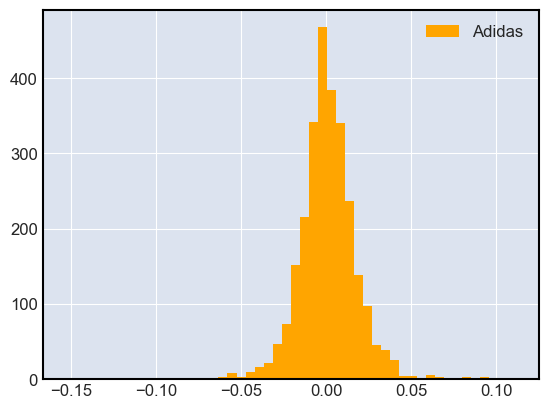

In [45]:
adidas['Returns'].hist(bins=50,label='Adidas',color='orange')
plt.legend();

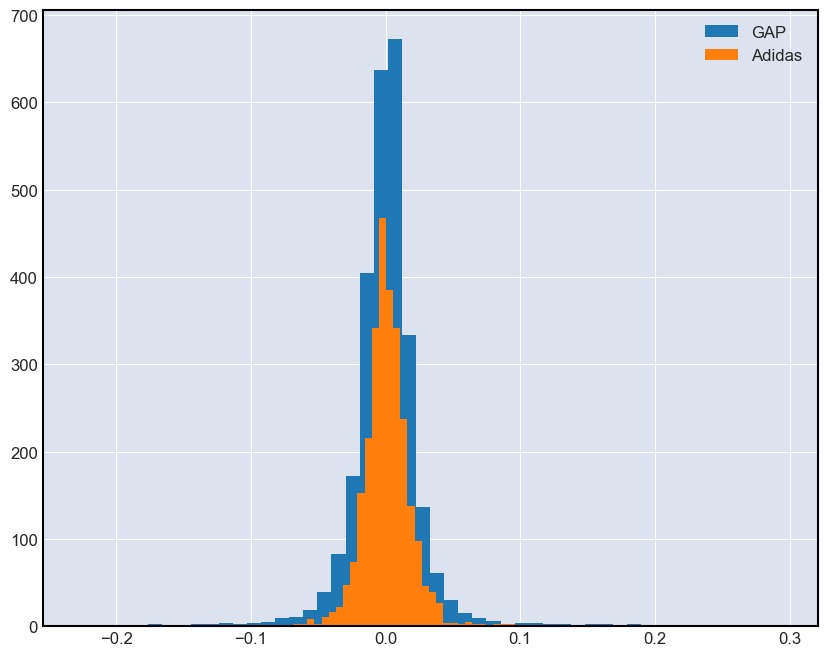

In [46]:
gap['Returns'].hist(bins=50,label='GAP',figsize=(10,8));
adidas['Returns'].hist(bins=50,label='Adidas')
plt.legend();

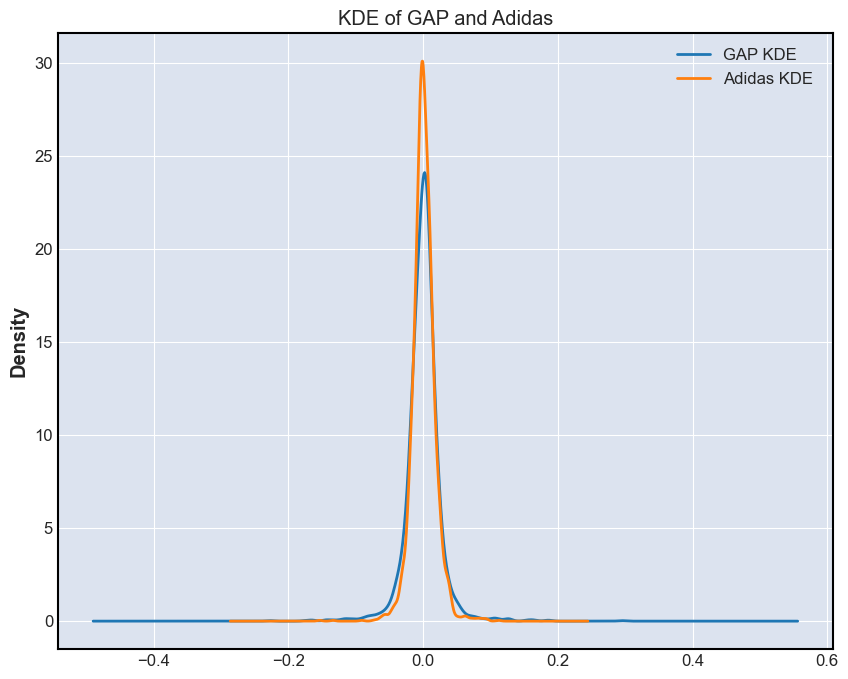

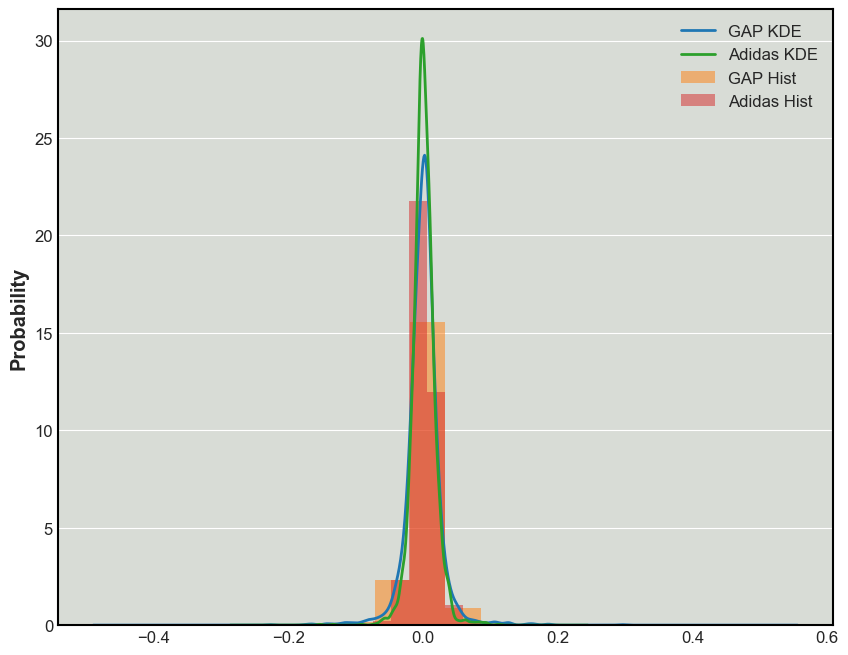

In [47]:
import seaborn as sns 

gap['Returns'].plot.kde(label='GAP KDE',figsize=(10,8),title='KDE of GAP and Adidas');
adidas['Returns'].plot.kde(label='Adidas KDE ')
plt.legend();

fig, ax = plt.subplots()
gap['Returns'].plot.kde(ax=ax,legend=True,label='GAP KDE',figsize=(10,8))
gap['Returns'].plot.hist(density=True, ax=ax,label='GAP Hist',alpha=0.5)
adidas['Returns'].plot.kde(ax=ax,legend=True,label='Adidas KDE')
adidas['Returns'].plot.hist(density=True, ax=ax,label='Adidas Hist',alpha=0.5)
ax.set_ylabel('Probability')
ax.grid(axis='x')
ax.set_facecolor('#d8dcd6')
plt.legend();


## d) Boxplots of past 90 days

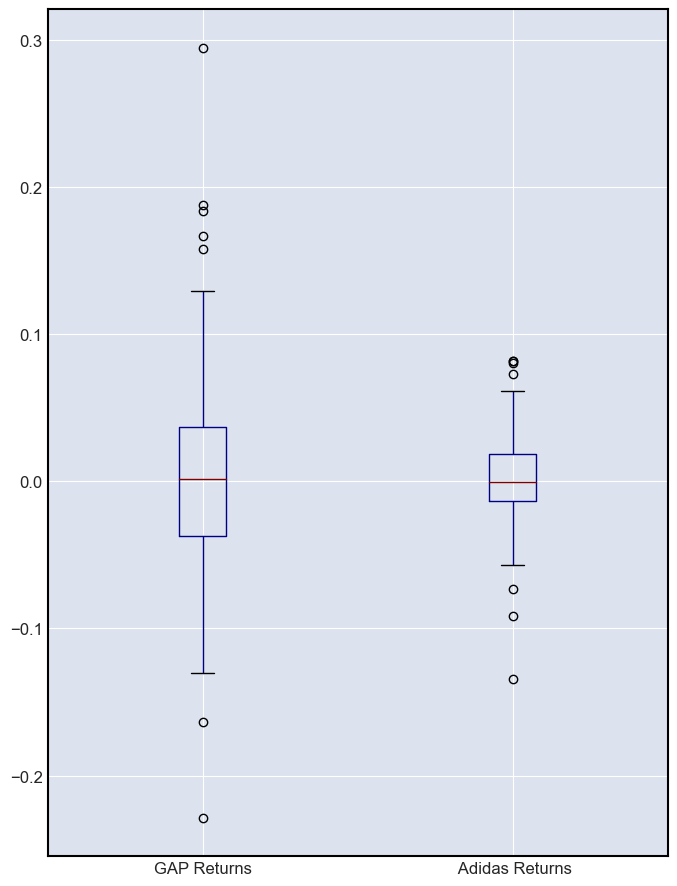

In [48]:
box_adigap = pd.concat([gap['Returns'][-120:],adidas['Returns'][-120:]],axis=1)
box_adigap.columns = ['GAP Returns',' Adidas Returns']
box_adigap.plot(kind='box',figsize=(8,11),colormap='jet');

## e) Daily Returns Comparison

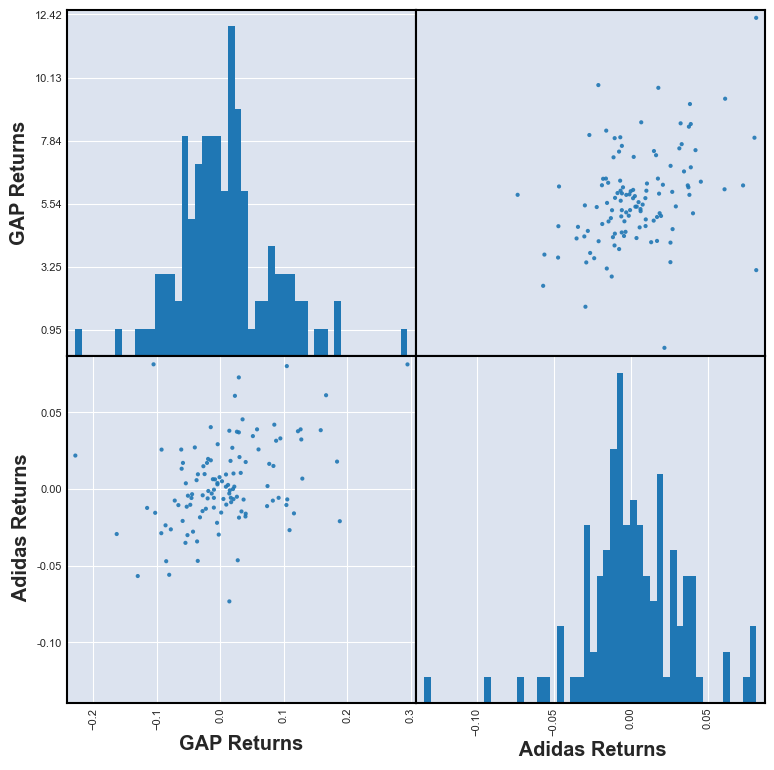

In [49]:
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FormatStrFormatter

axes = scatter_matrix(box_adigap, alpha=0.9, figsize=(9,9), hist_kwds={'bins':50})
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

# 5.Ordinary Least-Squares Regression with statsmodels.api 

In [50]:
import numpy as np
import statsmodels.api as sm

In [51]:
for n in [20,50,100,200]:
    # MA indicator divided by Adj Close
    gap['MA' + str(n)] =gap['Open'].rolling(n).mean().values  / gap['Adj Close']   

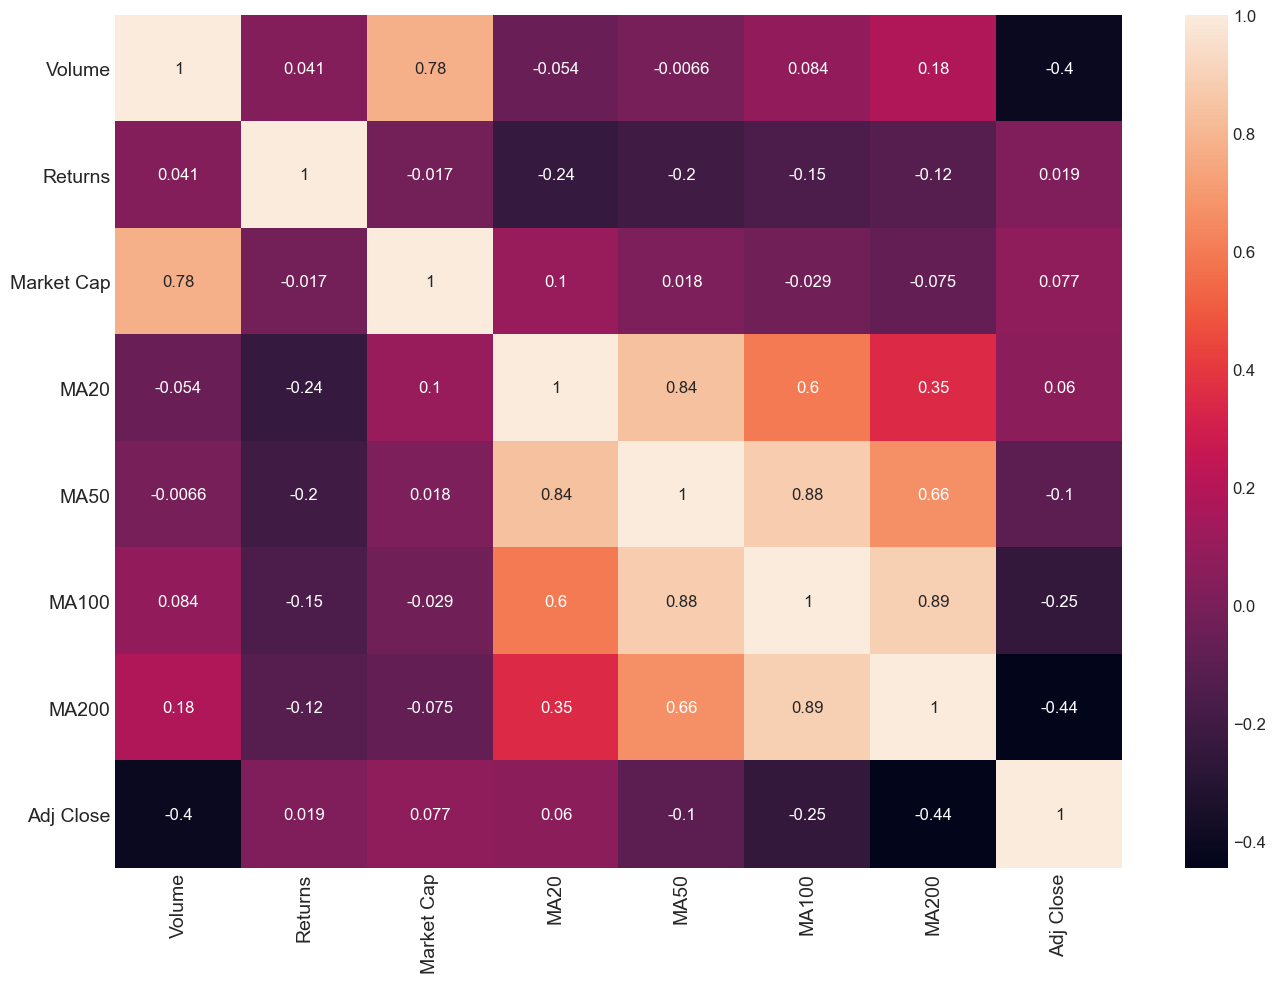

In [52]:
#Drop al NA values
gap = gap.dropna(axis=0)

#Create targets
targets = gap['Adj Close']

#Create features
features = gap[['Volume','Returns', 'Market Cap', 'MA20', 'MA50', 'MA100', 'MA200']]

#DataFrame from features columns and a target colum
features_targets = pd.concat([features,targets], axis=1)

#Heatmap Correlation Matrix
corr = features_targets.corr()

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax=sns.heatmap(corr,annot= True)

plt.yticks(rotation=0, size = 14) 
plt.xticks(rotation=90, size = 14)  
plt.tight_layout()  
plt.show();

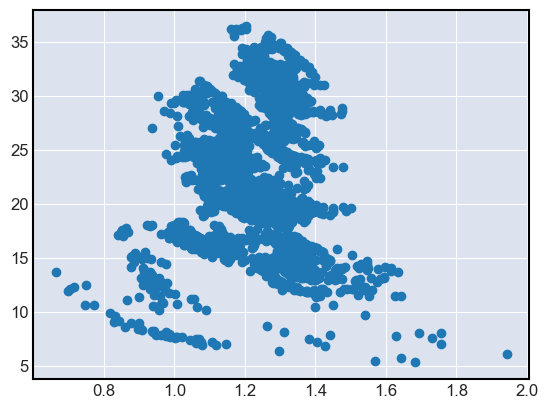

In [53]:
#Scatter plot of a strongly correlated variable with the target  
plt.scatter(gap['MA20'], gap['Adj Close'])
plt.show()

In [54]:
#Add a constant
linear_features = sm.add_constant(features)

#Create training and test size
train_size = int(0.85 * linear_features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]

test_features = linear_features[train_size:]
test_targets = targets[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)

(2486, 8) (2113, 8) (373, 8)


In [55]:
#Create the model
model = sm.OLS(train_targets, train_features)

#Fit the model
results = model.fit()  
print(results.summary());

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     850.3
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:24:35   Log-Likelihood:                -5450.9
No. Observations:                2113   AIC:                         1.092e+04
Df Residuals:                    2105   BIC:                         1.096e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5329      0.891     35.395      0.0

In [56]:
print(results.pvalues)  

const         1.008545e-215
Volume         0.000000e+00
Returns        1.000850e-01
Market Cap     0.000000e+00
MA20           1.168869e-03
MA50           1.567904e-01
MA100          1.961896e-05
MA200          9.593502e-11
dtype: float64


In [57]:
#Predict
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

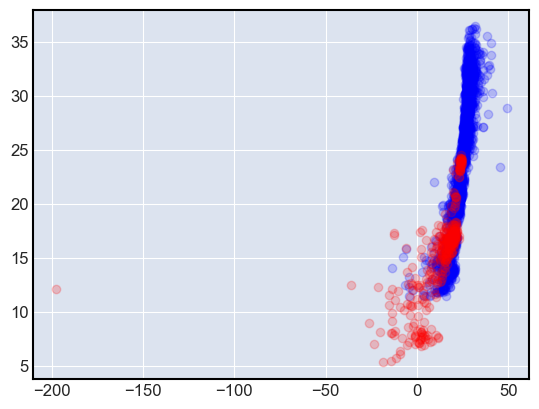

In [58]:
#Predictions vs Targets
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test');

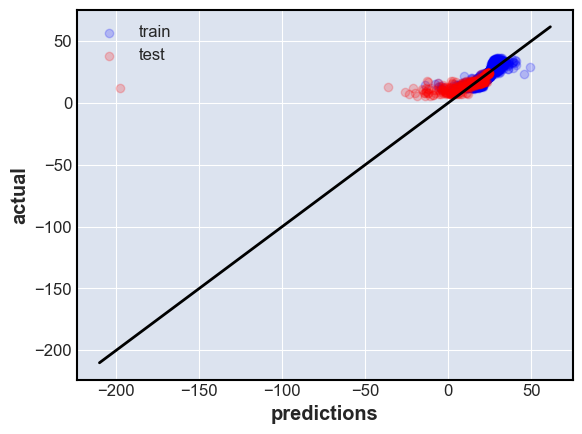

In [59]:
#Predictions vs Targets
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test');

#Prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  
plt.show();

# 6. Linear Regression with sklearn

In [60]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

In [61]:
adidas.head()

,High,Low,Open,Close,Volume,Adj Close,Market Cap,MA50,MA200,3-month-SMA,6-month-SMA,EWMA3,Returns
Date,,,,,,,,,,,,,
2010-01-04,38.525002,37.685001,37.959999,38.505001,953276.0,32.082249,3.618636e+07,NaN,NaN,NaN,NaN,37.959999,NaN
2010-01-05,40.049999,38.820000,39.000000,39.720001,2463075.0,33.094582,9.605992e+07,NaN,NaN,NaN,NaN,38.653333,0.031554
2010-01-06,40.064999,39.095001,39.799999,39.400002,1099488.0,32.827965,4.375962e+07,NaN,NaN,38.919999,NaN,39.308571,-0.008056
2010-01-07,40.000000,39.115002,39.365002,39.744999,1085415.0,33.115417,4.272736e+07,NaN,NaN,39.388334,NaN,39.338667,0.008756
2010-01-08,39.994999,39.250000,39.724998,39.599998,719621.0,32.994598,2.858694e+07,NaN,NaN,39.630000,NaN,39.538064,-0.003648


In [62]:
adidas.shape

(2705, 13)

In [63]:
#Drop al NA values
new_adidas = adidas.dropna(axis=0)
int(0.85 * new_adidas.shape[0]) #2298 = train size

#Train-test split
train =new_adidas[:2300]
test = new_adidas[2300:]

#Training
x_train = train.iloc[:, train.columns != 'Adj Close']
y_train = train['Adj Close']

#Validation
x_test = test.iloc[:, test.columns != 'Adj Close']
y_test = test['Adj Close']

#Selecting and fitting the model
model = LinearRegression()
model.fit(x_train, y_train)

#Prediction
prediction = model.predict(x_test)

#RMS
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(prediction)),2)))
print(rms)

4.663005909570213


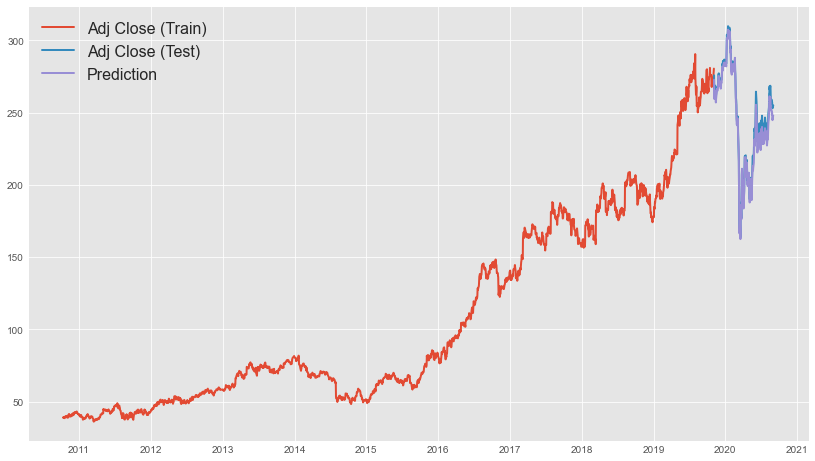

In [69]:
#Result
test.loc[:,'Prediction'] = 0
test.loc[:,'Prediction'] = prediction

fig = plt.figure(figsize=(14,8))
plt.plot(train['Adj Close'],label='Adj Close (Train)')
plt.plot(test['Adj Close'],label='Adj Close (Test)')
plt.plot(test['Prediction'],label='Prediction')
plt.legend(fontsize=16);

# 7.k-Nearest Neighbors

In [70]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [71]:
#Drop al NA values
new_gap = gap.dropna(axis=0)

#Train-test split
train_size = int(new_gap.shape[0]*0.8) #~2000

train = new_gap[:2000]
test = new_gap[2000:]

#Train features and targets 
x_train = train[['Open','Volume','Returns', 'Market Cap', 'MA20', 'MA50', 'MA100', 'MA200']]
y_train = train['Adj Close']

#Test features and targets
x_test = test[['Open','Volume','Returns', 'Market Cap', 'MA20', 'MA50', 'MA100', 'MA200']]
y_test = test['Adj Close']

#Scale data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#Gridsearch to find best k for knn
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#Fit the model
model.fit(x_train, y_train)

#Predict
prediction = model.predict(x_test)
prediction.shape

(486,)

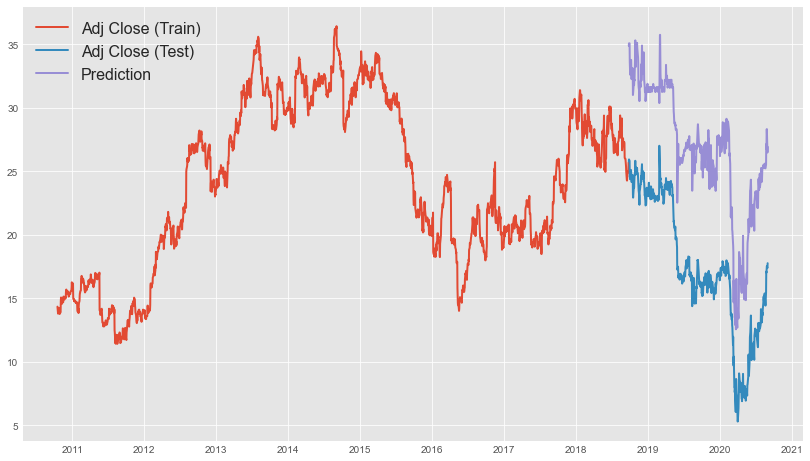

In [80]:
#Results
test['Prediction'] = 0
test['Prediction'] = prediction

fig = plt.figure(figsize=(14,8))
plt.plot(train['Adj Close'],label='Adj Close (Train)')
plt.plot(test['Adj Close'],label = 'Adj Close (Test)')
plt.plot(test['Prediction'],label = 'Prediction')
plt.legend(fontsize=16);

# 8.Neural Networks: Mutilayer Perceptron

In [81]:
import tensorflow as tf
from tensorflow.keras import layers

In [82]:
#Model Selection
model = tf.keras.models.Sequential()

#Add Layers
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

#Optimizer and Loss Function
model.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
#Drop al NA values
new_gap = gap.dropna(axis=0)

#Train-test split
train_size = int(new_gap.shape[0]*0.8) #~2000

train = new_gap[:2000]
test = new_gap[2000:]

#Train features and targets 
x_train = train[['Open','Volume','Returns', 'Market Cap', 'MA20', 'MA50', 'MA100', 'MA200']]
y_train = train['Adj Close']

#Test features and targets
x_test = test[['Open','Volume','Returns', 'Market Cap', 'MA20', 'MA50', 'MA100', 'MA200']]
y_test = test['Adj Close']

In [85]:
#Train Data
X_train = np.array(x_train)
Y_train = np.array(y_train)

#Fit the model
model.fit(X_train, Y_train, epochs=500)

Train on 2000 samples
Epoch 1/500
2000/2000 [==============================] - 1s 298us/sample - loss: 622.8977
Epoch 2/500
2000/2000 [==============================] - 0s 66us/sample - loss: 622.8977
Epoch 3/500
2000/2000 [==============================] - 0s 80us/sample - loss: 622.8977
Epoch 4/500
2000/2000 [==============================] - 0s 86us/sample - loss: 622.8977
Epoch 5/500
2000/2000 [==============================] - 0s 108us/sample - loss: 622.8977
Epoch 6/500
2000/2000 [==============================] - 0s 76us/sample - loss: 622.8977
Epoch 7/500
2000/2000 [==============================] - 0s 70us/sample - loss: 622.8977
Epoch 8/500
2000/2000 [==============================] - 0s 62us/sample - loss: 622.8977
Epoch 9/500
2000/2000 [==============================] - 0s 77us/sample - loss: 622.8977
Epoch 10/500
2000/2000 [==============================] - 0s 71us/sample - loss: 622.8977
Epoch 11/500
2000/2000 [==============================] - 0s 67us/sample - loss: 622.

2000/2000 [==============================] - 0s 61us/sample - loss: 622.8977
Epoch 182/500
2000/2000 [==============================] - 0s 59us/sample - loss: 622.8977
Epoch 183/500
2000/2000 [==============================] - 0s 63us/sample - loss: 622.8977
Epoch 184/500
2000/2000 [==============================] - 0s 55us/sample - loss: 622.8977
Epoch 185/500
2000/2000 [==============================] - 0s 60us/sample - loss: 622.8977
Epoch 186/500
2000/2000 [==============================] - 0s 58us/sample - loss: 622.8977
Epoch 187/500
2000/2000 [==============================] - 0s 57us/sample - loss: 622.8977
Epoch 188/500
2000/2000 [==============================] - 0s 60us/sample - loss: 622.8977
Epoch 189/500
2000/2000 [==============================] - 0s 59us/sample - loss: 622.8977
Epoch 190/500
2000/2000 [==============================] - 0s 61us/sample - loss: 622.8977
Epoch 191/500
2000/2000 [==============================] - 0s 59us/sample - loss: 622.8977
Epoch 192/500

Epoch 271/500
2000/2000 [==============================] - 0s 55us/sample - loss: 622.8977
Epoch 272/500
2000/2000 [==============================] - 0s 52us/sample - loss: 622.8977
Epoch 273/500
2000/2000 [==============================] - 0s 49us/sample - loss: 622.8977
Epoch 274/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 275/500
2000/2000 [==============================] - 0s 49us/sample - loss: 622.8977
Epoch 276/500
2000/2000 [==============================] - 0s 56us/sample - loss: 622.8977
Epoch 277/500
2000/2000 [==============================] - 0s 53us/sample - loss: 622.8977
Epoch 278/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 279/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 280/500
2000/2000 [==============================] - 0s 51us/sample - loss: 622.8977
Epoch 281/500
2000/2000 [==============================] - 0s 54us/sample - loss: 622.8977

2000/2000 [==============================] - 0s 54us/sample - loss: 622.8977
Epoch 362/500
2000/2000 [==============================] - 0s 60us/sample - loss: 622.8977
Epoch 363/500
2000/2000 [==============================] - 0s 57us/sample - loss: 622.8977
Epoch 364/500
2000/2000 [==============================] - 0s 58us/sample - loss: 622.8977
Epoch 365/500
2000/2000 [==============================] - 0s 56us/sample - loss: 622.8977
Epoch 366/500
2000/2000 [==============================] - 0s 58us/sample - loss: 622.8977
Epoch 367/500
2000/2000 [==============================] - 0s 55us/sample - loss: 622.8977
Epoch 368/500
2000/2000 [==============================] - 0s 58us/sample - loss: 622.8977
Epoch 369/500
2000/2000 [==============================] - 0s 55us/sample - loss: 622.8977
Epoch 370/500
2000/2000 [==============================] - 0s 48us/sample - loss: 622.8977
Epoch 371/500
2000/2000 [==============================] - 0s 53us/sample - loss: 622.8977
Epoch 372/500

Epoch 451/500
2000/2000 [==============================] - 0s 53us/sample - loss: 622.8977
Epoch 452/500
2000/2000 [==============================] - 0s 49us/sample - loss: 622.8977
Epoch 453/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 454/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 455/500
2000/2000 [==============================] - 0s 54us/sample - loss: 622.8977
Epoch 456/500
2000/2000 [==============================] - 0s 52us/sample - loss: 622.8977
Epoch 457/500
2000/2000 [==============================] - 0s 54us/sample - loss: 622.8977
Epoch 458/500
2000/2000 [==============================] - 0s 54us/sample - loss: 622.8977
Epoch 459/500
2000/2000 [==============================] - 0s 49us/sample - loss: 622.8977
Epoch 460/500
2000/2000 [==============================] - 0s 50us/sample - loss: 622.8977
Epoch 461/500
2000/2000 [==============================] - 0s 56us/sample - loss: 622.8977

In [86]:
prediction = model.predict(x_test)

In [87]:
#RMS
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(prediction)),2)))
print(rms)

18.22427032155971


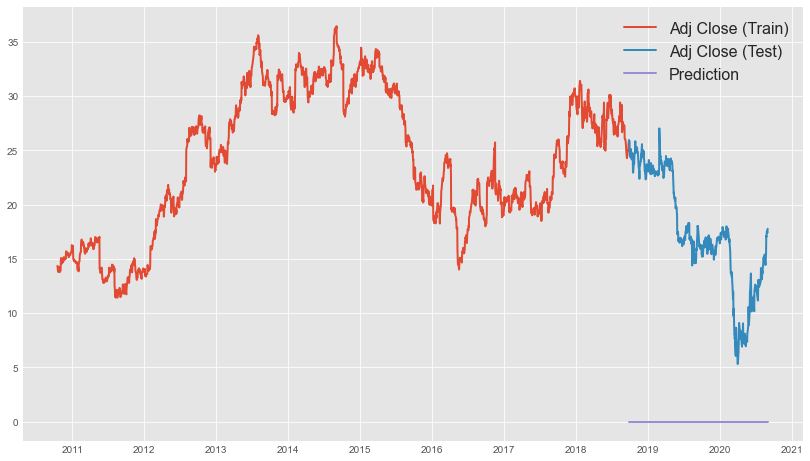

In [90]:
#Results -> worse than k-Nearest Neighbors 
test['Prediction'] = 0
test['Prediction'] = prediction

fig = plt.figure(figsize=(14,8))
plt.plot(train['Adj Close'],label='Adj Close (Train)')
plt.plot(test['Adj Close'],label = 'Adj Close (Test)')
plt.plot(test['Prediction'],label = 'Prediction')
plt.legend(fontsize=16);